In [107]:
import numpy as np
import matplotlib.pyplot as plt
class Hopfield_net:
    def __init__(self,stored_X):
        self.W=np.dot(stored_X.T,stored_X)
        np.fill_diagonal(self.W,0)
    def predict(self,x,asy=False,bias=0):
        maxiters=5
        s = x.copy()
        if asy:
            maxiters=10
            order = np.arange(x.shape[0])
            for j in range(maxiters):
                np.random.shuffle(order)
                # if j % 1 ==0:
                #     print(j,"\n\n")
                #     plt.imshow(s.reshape((32,32)))
                #     plt.show()
                for i in order: 
                    if np.sum(self.W[i,:]*s+bias)>=0:
                        s[i]=1
                    else:
                        s[i]=-1
        else:
            for i in range(maxiters):
                t = np.sum(self.W*s,axis=1)+bias
                s = np.where(t>=0,1,-1)
        return s
    def energy(self,x):
        return -np.dot(x*self.W,x.T)/2

        

input_ 2


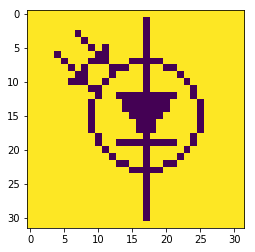

output_ 2


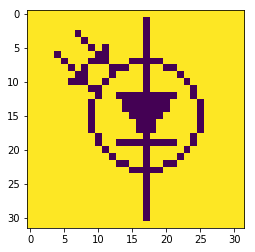

In [10]:

inputs = np.loadtxt('pict.dat', delimiter= ',' , dtype=int).reshape((11,1024))
test = Hopfield_net(inputs[:3])
x=2
print("input_",x)
plt.imshow(inputs[x].reshape((32,32)))
plt.show()
print("output_",x)
plt.imshow(test.predict(inputs[x]).reshape((32,32)))
plt.show()
    




input_ 9


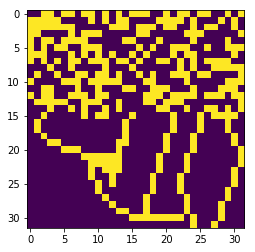

output_ 9


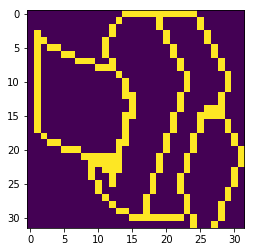

In [11]:
x=9
print("input_",x)
plt.imshow(inputs[x].reshape((32,32)))
plt.show()
print("output_",x)
plt.imshow(test.predict(inputs[x]).reshape((32,32)))
plt.show()
    


input_ 10


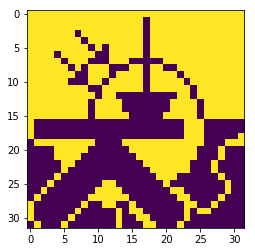

output_ 10


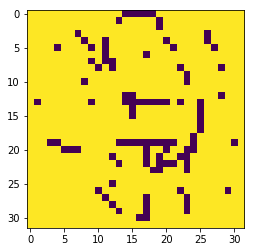

In [12]:
x=10
print("input_",x)
plt.imshow(inputs[x].reshape((32,32)))
plt.show()
print("output_",x)
plt.imshow(test.predict(inputs[x]).reshape((32,32)))
plt.show()


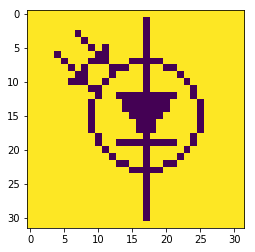

In [62]:
plt.imshow(test.predict(inputs[10],asy=True).reshape((32,32)))
plt.show()

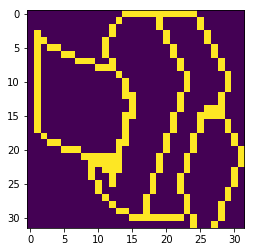

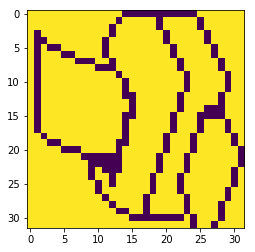

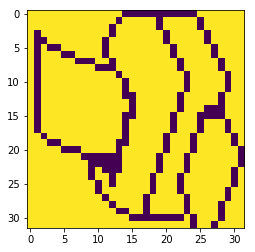

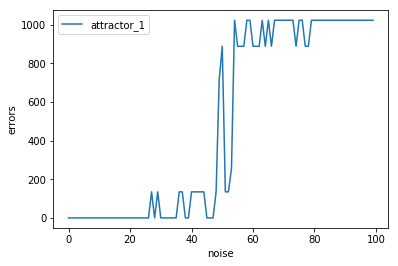

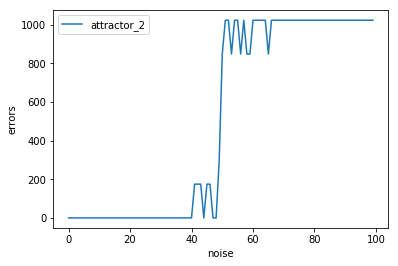

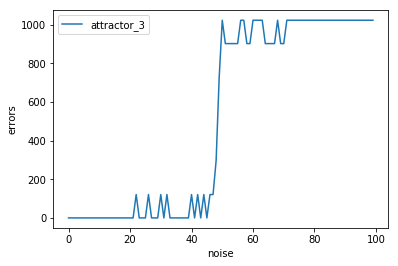

In [16]:
def add_noise(x,rate):
    temp = np.random.uniform(0,1,x.shape)
    temp = np.where(temp<rate,-1,1)
    return  np.multiply(x,temp)
plt.imshow(inputs[0].reshape((32,32)))
plt.show()
plt.imshow(add_noise(inputs[0],1).reshape((32,32)))
plt.show()
plt.imshow(test.predict(add_noise(inputs[0],1)).reshape((32,32)))
plt.show()
errors =np.zeros((3,100))
for i in range(3):
    for j in range(100):
        x = add_noise(inputs[i],j/100)
        y = test.predict(x,asy=True)
        errors[i][j]=np.sum(np.where(inputs[i]!=y,1,0))
    plt.plot(errors[i],label='attractor_%d'%(i+1))
    plt.ylabel('errors')
    plt.xlabel('noise')
    plt.legend()
    plt.show()

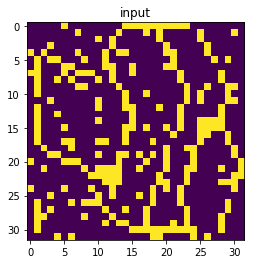

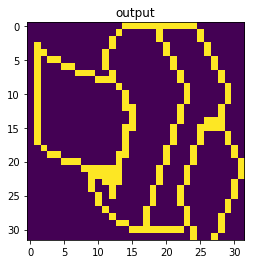

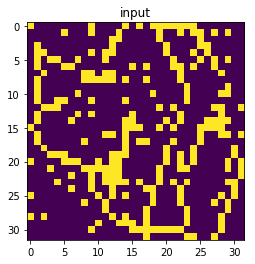

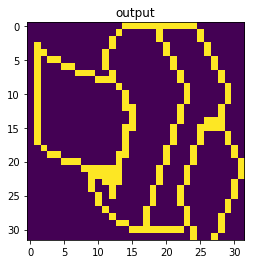

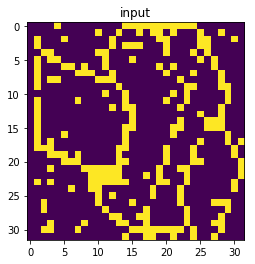

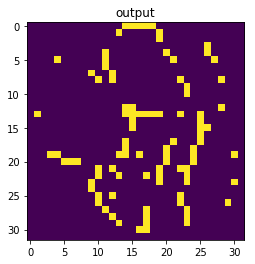

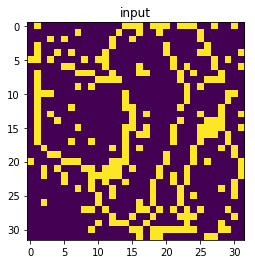

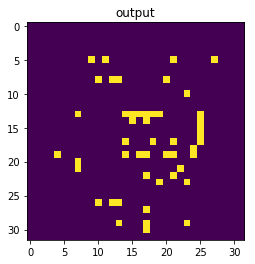

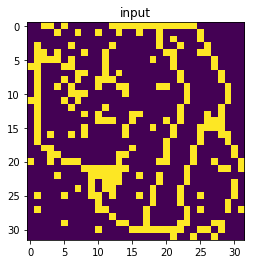

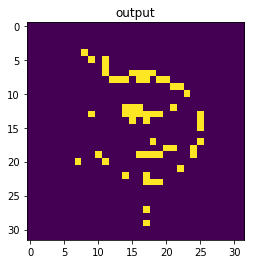

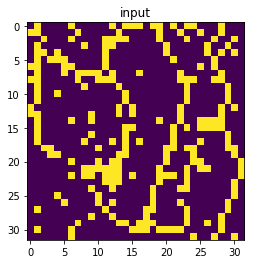

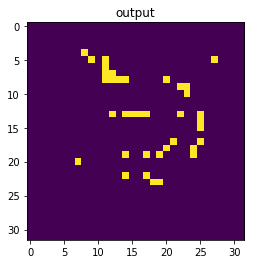

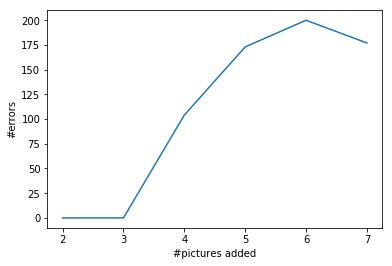

In [17]:
errors=[]
for i in range(2,8):
    test1 = Hopfield_net(inputs[:i])
    x = add_noise(inputs[0],0.1)
    y = test1.predict(x)
    plt.imshow(x.reshape((32,32)))
    plt.title("input")
    plt.show()
    plt.title("output")
    plt.imshow(y.reshape((32,32)))
    plt.show()
    errors.append(np.sum(np.where(y!=inputs[0],1,0)))
plt.plot([i for i in range(2,8)],errors)
plt.xlabel("#pictures added")
plt.ylabel("#errors")
plt.show()


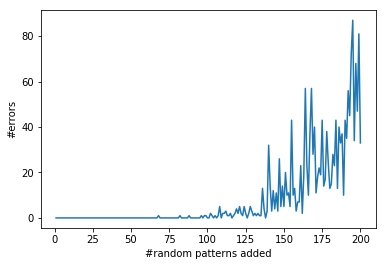

In [39]:
errors=[]
for i in range(200):
    random_sample = np.random.binomial(1,0.5,(i+1)*1024).reshape((i+1),1024)
    random_sample[random_sample==0]=-1
    test2= Hopfield_net(random_sample)
    x = random_sample[0]
    y = test2.predict(x)
    errors.append(np.sum(np.where(y!=random_sample[0],1,0)))
plt.plot([i for i in range(1,201)],errors)
plt.xlabel("#random patterns added")
plt.ylabel("#errors")
plt.title("The network's performance on random patterns")
plt.show()



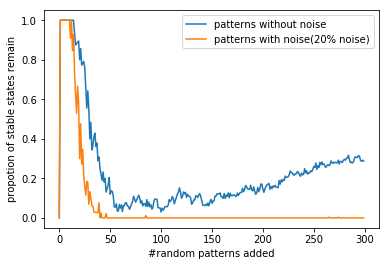

In [69]:
random_sample = np.random.binomial(1,0.5,300*100).reshape(300,100)
random_sample[random_sample==0]=-1
succ = np.zeros(300)
succ_noise=np.zeros(300)
test3=Hopfield_net(random_sample[:1])
test3.W=np.zeros((100,100))
test3.W+=np.outer(random_sample[0],random_sample[0])
for i in range(1,300):
    test3.W+=np.outer(random_sample[i],random_sample[i])
    for j in range(i):
        y_noise = test3.predict(add_noise(random_sample[j],0.1))
        y=test3.predict(random_sample[j])
        succ[i]+=np.array_equal(y,random_sample[j])
        succ_noise[i]+=np.array_equal(y_noise,random_sample[j])
    succ[i]/=i
    succ_noise[i]/=i
plt.plot(succ,label='patterns without noise')
plt.plot(succ_noise,label='patterns with noise(10% noise)')
plt.xlabel("#random patterns added")
plt.ylabel("propotion of stable states remain")
plt.legend()
plt.show()

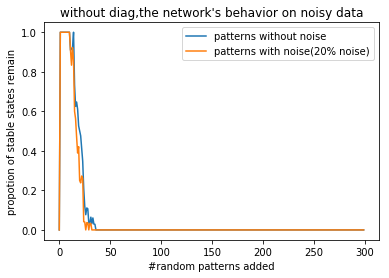

In [90]:
succ = np.zeros(300)
succ_noise=np.zeros(300)
for i in range(1,300):
    test4=Hopfield_net(random_sample[:i+1])
    for j in range(i):
        y_noise = test4.predict(add_noise(random_sample[j],0.1))
        y = test4.predict(random_sample[j])
        succ[i]+=np.array_equal(y,random_sample[j])
        succ_noise[i]+=np.array_equal(y_noise,random_sample[j])
    succ[i]/=i
    succ_noise[i]/=i
plt.plot(succ,label='patterns without noise')
plt.plot(succ_noise,label='patterns with noise(10% noise)')
plt.title("without diag,the network's behavior on noisy data")
plt.xlabel("#random patterns added")
plt.ylabel("propotion of stable states remain")
plt.legend()
plt.show()

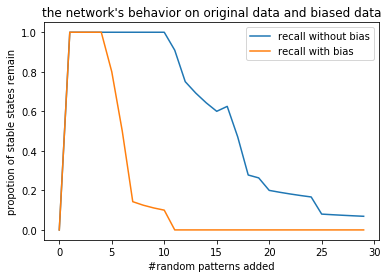

In [113]:
random_sample = np.random.randn(30,100)
random_sample_bias=np.where(random_sample+0.5>=0,1,-1)
random_sample = np.where(random_sample>=0,1,-1)
succ = np.zeros(30)
succ_bias=np.zeros(30)
for i in range(1,30):
    test4=Hopfield_net(random_sample[:i+1])
    test5=Hopfield_net(random_sample_bias[:i+1])
    for j in range(i):
        y_bias = test5.predict(random_sample_bias[j])
        y = test4.predict(random_sample[j])
        succ[i]+=np.array_equal(y,random_sample[j])
        succ_bias[i]+=np.array_equal(y_bias,random_sample_bias[j])
    succ[i]/=i
    succ_bias[i]/=i
plt.plot(succ,label='recall without bias')
plt.plot(succ_bias,label='recall with bias')
plt.title("the network's behavior on original data and biased data")
plt.xlabel("#random patterns added")
plt.ylabel("propotion of stable states remain")
plt.legend()
plt.show()